In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars = star_wars[pd.notna(star_wars['RespondentID'])]

In [5]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [6]:
# convert response to Ture and False
response_map = {'Yes':True,'No':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(response_map)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']= star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(response_map)


In [7]:
# convert other columns value to boolean and change its name

col_name_map = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
               'Unnamed: 4':'seen_2',
               'Unnamed: 5':'seen_3',
               'Unnamed: 6':'seen_4',
               'Unnamed: 7':'seen_5',
               'Unnamed: 8':'seen_6',
               'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
               'Unnamed: 10':'ranking_2',
               'Unnamed: 11':'ranking_3',
               'Unnamed: 12':'ranking_4',
               'Unnamed: 13':'ranking_5',
               'Unnamed: 14':'ranking_6'}
movie_name_map = {"Star Wars: Episode I  The Phantom Menace":True,
                  'Star Wars: Episode II  Attack of the Clones':True,
                  'Star Wars: Episode III  Revenge of the Sith':True,
                  'Star Wars: Episode IV  A New Hope':True,
                  'Star Wars: Episode V The Empire Strikes Back':True,
                  'Star Wars: Episode VI Return of the Jedi':True,
                 np.NAN:False}
for col_name in star_wars.columns[3:9]:
    star_wars[col_name] = star_wars[col_name].map(movie_name_map)
star_wars = star_wars.rename(columns=col_name_map)
# change the data type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Find out the most popular movie

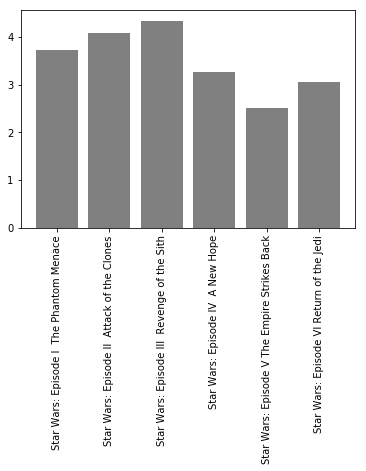

In [48]:
import matplotlib.pyplot as plt
plt.bar(range(len(list(star_wars[star_wars.columns[9:15]].mean()))),star_wars[star_wars.columns[9:15]].mean(),color = 'grey')
plt.xticks(range(len(list(star_wars[star_wars.columns[9:15]].mean()))),movie_name_map.keys(),rotation = 90)
plt.show()

Since lower ranking is better, the fifth series of star_war is the most impressive and recent movies are getting lower rate than the first 3 start war.

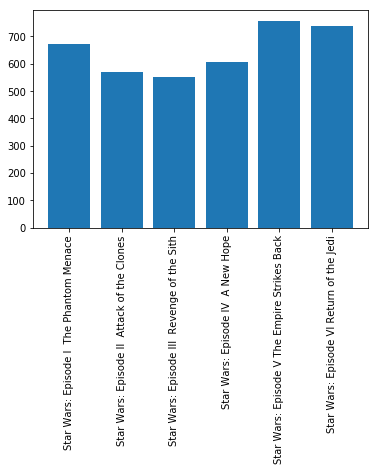

In [53]:
plt.bar(range(6),star_wars[star_wars.columns[3:9]].sum())
plt.xticks(range(6),movie_name_map.keys(),rotation = 90)
plt.show()

We found more poeple watched the last 3 movies. This can explain why these three got higher reputation among audiance.

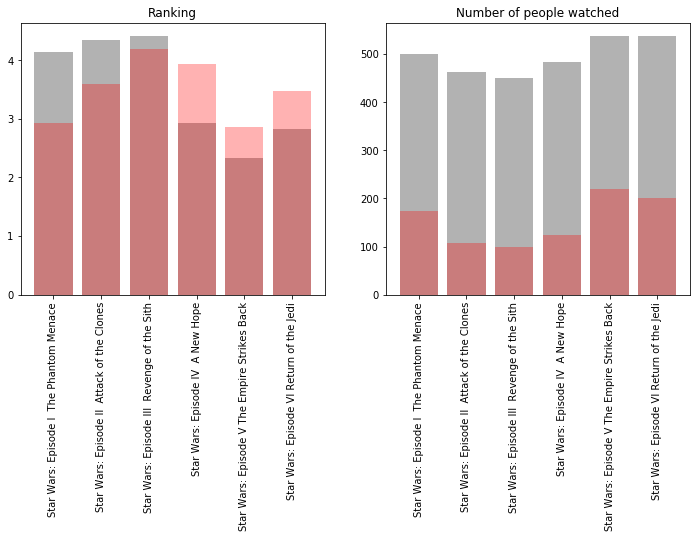

In [87]:
star_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
not_star_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(range(6),star_fan[star_fan.columns[9:15]].mean(),color = 'black',alpha = 0.3)
ax1.bar(range(6),not_star_fan[not_star_fan.columns[9:15]].mean(),color = 'red',alpha = 0.3)
ax1.set_xticks(range(0,6))
ax1.set_xticklabels(movie_name_map.keys(),rotation = 90)
ax1.set_title('Ranking')

ax2.bar(range(6),star_fan[star_fan.columns[3:9]].sum(),color = 'black',alpha = 0.3)
ax2.bar(range(6),not_star_fan[not_star_fan.columns[3:9]].sum(),color = 'red',alpha = 0.3)
ax2.set_xticks(range(0,6))
ax2.set_xticklabels(movie_name_map.keys(),rotation = 90)
ax2.set_title('Number of people watched')
plt.show()

What we found is that star war fans love recent star war movies much deeper than previous ones, while the non star fans love the very beginning and the very end ones. As for the pattern shown in the second bar chart, both group shows similar tendency: high in the first series, low in the middle and jump high in number in the last two movies.